<a href="https://colab.research.google.com/github/susansunshin/FoodPredictionProject/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Final

Susan Shin

##PreProcessing

###Loading data and imports

In [ ]:
#Load Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import set_config
set_config(display='diagram')

In [ ]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/sample_data/sales_predictions.csv'
df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Create Copy
df_ml = df

###Analyze data

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####Duplicates

In [ ]:
df_ml.duplicated().sum()

0

There are no duplicates in this data.

####Inconsistancies

In [ ]:
dtypes = df_ml.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
  
for col in str_cols:
  print(f"- Column= {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    9

Item Fat Content needs to be corrected for inconsitancies.

In [ ]:
df_ml["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_ml["Item_Fat_Content"].replace(["LF", "low fat", "reg"], ["Low Fat", "Low Fat","Regular"], inplace = True)

In [ ]:
df_ml["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Split

In [ ]:
X = df_ml.drop(columns = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], axis = 1)
y = df_ml["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


In [ ]:
X_train["Item_Fat_Content"].value_counts()

Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64

###Check for Missing Values

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5285 non-null   float64
 1   Item_Fat_Content      6392 non-null   object 
 2   Item_Visibility       6392 non-null   float64
 3   Item_Type             6392 non-null   object 
 4   Item_MRP              6392 non-null   float64
 5   Outlet_Size           4580 non-null   object 
 6   Outlet_Location_Type  6392 non-null   object 
 7   Outlet_Type           6392 non-null   object 
dtypes: float64(3), object(5)
memory usage: 449.4+ KB


Outlet Size and Item Weight will need to be filled.

Item weight will be filled with average and Outlet Size will be filled with mean.

###Column Transform

In [ ]:
#Create selectors
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [ ]:
#Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

#Scaler
scaler = StandardScaler()

#One hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
#Create piplines
numeric_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

In [ ]:
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#Tuples
num_tup = (numeric_pipe, num_selector)
cat_tup = (cat_pipe, cat_selector)

In [ ]:
#Column transformer
preprocessor = make_column_transformer(cat_tup, num_tup, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8110>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8810>)])

##Linear Regression Model
* Build a linear regression model.
* Evaluate the performance of your model based on r^2.
* Evaluate the performance of your model based on rmse.

In [ ]:
#Fit and view scores
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8110>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8810>)])),
                ('linearregression', LinearRegression())])

In [ ]:
def eval_regression(true, pred):

  mae = round(mean_absolute_error(true, pred),2)
  mse = round(mean_squared_error(true, pred),2)
  rmse = round(np.sqrt(mse),2)
  r2 = round(r2_score(true, pred),2)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2}\n ')

In [ ]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [ ]:
eval_regression(y_train, train_pred)
eval_regression(y_test, test_pred)

MAE 847.76,
 MSE 1302620.23,
 RMSE: 1141.32,
 R^2: 0.56
 
MAE 805.16,
 MSE 1196831.66,
 RMSE: 1094.0,
 R^2: 0.57
 


####Evaluation

The linear regression model is underfit as the R^2 score is low for both test and train.

The RMSE is also quite high making this model a poor fit.

##Regression Tree Model
* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
* Compare the performance of your model based on rmse.

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8110>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8810>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
train_pred_rf = rf_pipe.predict(X_train)
test_pred_rf = rf_pipe.predict(X_test)

In [ ]:
eval_regression(y_train, train_pred_rf)
eval_regression(y_test, test_pred_rf)

MAE 299.59,
 MSE 186290.59,
 RMSE: 431.61,
 R^2: 0.94
 
MAE 775.16,
 MSE 1255505.1,
 RMSE: 1120.49,
 R^2: 0.54
 


This model is overfitted as the R^2 in train is 94% and test is 55%.

I will try to tune the model to get a more accurate result.

####Tune Depth

In [ ]:
#Find max depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

43

In [ ]:
#Loop through depths
depths = range(1, 43)
scores = pd.DataFrame(columns=['Train','Test'], index=depths)

for depth in depths:
  rf = RandomForestRegressor(max_depth = depth, random_state = 42)
  rf_pipe = make_pipeline(preprocessor, rf)
  rf_pipe.fit(X_train, y_train)
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)
  scores.loc[depth, 'Train'] = train_r2
  scores.loc[depth, 'Test'] = test_r2

In [ ]:
sorted_scores = scores.sort_values(by='Test', ascending=False)

In [ ]:
sorted_scores.head()

,Train,Test
5,0.610539,0.602662
6,0.624368,0.60094
7,0.642683,0.597511
4,0.595925,0.596632
8,0.665341,0.595666


A depth of 5 is the most ideal.



In [ ]:
#Rerun using depth of 5
rf5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf5_pipe = make_pipeline(preprocessor, rf5)
rf5_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8110>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd48b8810>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [ ]:
train_pred_rf5 = rf5_pipe.predict(X_train)
test_pred_rf5 = rf5_pipe.predict(X_test)

In [ ]:
eval_regression(y_train, train_pred_rf5)
eval_regression(y_test, test_pred_rf5)

MAE 755.37,
 MSE 1152592.01,
 RMSE: 1073.59,
 R^2: 0.61
 
MAE 728.39,
 MSE 1096246.53,
 RMSE: 1047.02,
 R^2: 0.6
 


##Model Decision

Although the Random Forest Regressor is quite low in terms of R^2, it's still better than the linear regression on all scores.

Recomendation for model is Random Forest Regressor.

#Data Visualizations

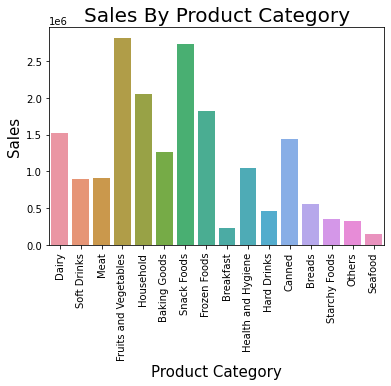

In [105]:
sns.barplot(
    x="Item_Type", 
    y="Item_Outlet_Sales",
    data=df_ml, estimator = sum,
    ci=None)
plt.xticks(rotation = 90, size = 10)
plt.title("Sales By Product Category", size = 20)
plt.xlabel("Product Category", size = 15)
plt.ylabel("Sales", size = 15);

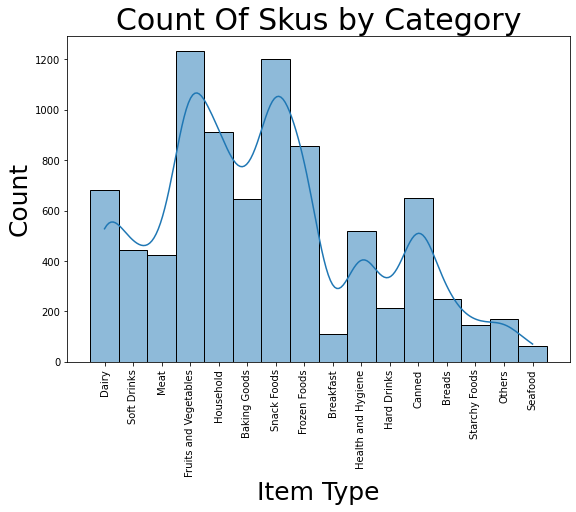

In [108]:
plt.figure(figsize=(9,6))
sns.histplot(df, x='Item_Type',kde=True)
plt.xticks(rotation = 90, size = 10)
plt.title("Count Of Skus by Category", size = 30)
plt.xlabel("Item Type", size = 25)
plt.ylabel("Count", size = 25);